In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
import statsmodels.api as sm
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa

In [383]:
raw = pd.read_csv("all_data_hourly.csv")
raw

,name,slottime_GMT,slottype,slotavg,pointTitle
0,Campus.CW.TONS,5/1/21 4:00,H,2451.879750,Total Chilled Water
1,Campus.Elec.Demand_MW,5/1/21 4:00,H,21.180990,Total Campus Electric Demand
2,Campus.STM.Flow,5/1/21 4:00,H,147.684086,Total Steam Flow
3,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,5/1/21 4:00,H,15.075800,Process Cooler 3 inch Chilled Water
4,CentralEnergyPlant.CW.SampleCooler.FP/TONS,5/1/21 4:00,H,6.732450,Sample Cooler Chilled Water
...,...,...,...,...,...
130690,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,5/2/23 3:00,H,30.334750,Process Cooler 3 inch Chilled Water
130691,CentralEnergyPlant.CW.SampleCooler.FP/TONS,5/2/23 3:00,H,3.059270,Sample Cooler Chilled Water
130692,CentralEnergyPlant.GTG1-2.PROCESS.CW.FP/TONS,5/2/23 3:00,H,184.149750,GTG 1 and 2 Process Chilled Water
130693,CentralEnergyPlant.GTG1-2.TurbineIntakeAir.CW....,5/2/23 3:00,H,0.050382,GTG 1 and 2 Turbine Intake Air Chilled Water


In [384]:
raw["slottime_GMT"] = raw["slottime_GMT"].apply(lambda x: datetime.strptime(x, "%m/%d/%y %H:%M").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
raw

,name,slottime_GMT,slottype,slotavg,pointTitle
0,Campus.CW.TONS,2021-05-01 00:00:00-04:00,H,2451.879750,Total Chilled Water
1,Campus.Elec.Demand_MW,2021-05-01 00:00:00-04:00,H,21.180990,Total Campus Electric Demand
2,Campus.STM.Flow,2021-05-01 00:00:00-04:00,H,147.684086,Total Steam Flow
3,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,2021-05-01 00:00:00-04:00,H,15.075800,Process Cooler 3 inch Chilled Water
4,CentralEnergyPlant.CW.SampleCooler.FP/TONS,2021-05-01 00:00:00-04:00,H,6.732450,Sample Cooler Chilled Water
...,...,...,...,...,...
130690,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,2023-05-01 23:00:00-04:00,H,30.334750,Process Cooler 3 inch Chilled Water
130691,CentralEnergyPlant.CW.SampleCooler.FP/TONS,2023-05-01 23:00:00-04:00,H,3.059270,Sample Cooler Chilled Water
130692,CentralEnergyPlant.GTG1-2.PROCESS.CW.FP/TONS,2023-05-01 23:00:00-04:00,H,184.149750,GTG 1 and 2 Process Chilled Water
130693,CentralEnergyPlant.GTG1-2.TurbineIntakeAir.CW....,2023-05-01 23:00:00-04:00,H,0.050382,GTG 1 and 2 Turbine Intake Air Chilled Water


In [385]:
weather = pd.read_csv("weather_hourly.csv")
weather

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h)
0,2021-05-01T00:00,42.0,68,32.2,31.1,1008.0,973.4,0.000,0.000,0.000,...,77,50,53,1,35,16,19,133.5,16.8,27.8
1,2021-05-01T01:00,40.4,71,31.6,29.5,1009.3,974.5,0.004,0.004,0.000,...,100,63,64,17,0,0,0,0.0,16.5,27.3
2,2021-05-01T02:00,39.3,75,31.9,28.6,1010.2,975.3,0.008,0.008,0.000,...,100,61,97,90,0,0,0,0.0,16.2,26.9
3,2021-05-01T03:00,38.1,77,31.6,28.1,1011.1,976.1,0.008,0.008,0.000,...,100,94,100,74,0,0,0,0.0,14.6,24.3
4,2021-05-01T04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,100,99,98,50,0,0,0,0.0,13.2,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2023-05-01T19:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,56,32,18,54,522,257,265,314.4,13.4,20.5
17540,2023-05-01T20:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,44,9,31,57,496,264,232,326.5,12.1,18.2
17541,2023-05-01T21:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,44,18,25,41,448,263,185,387.8,11.0,16.8
17542,2023-05-01T22:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,81,24,66,67,357,237,120,484.1,7.2,12.0


In [386]:
weather["time"] = weather["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
weather = weather.set_index("time")
weather

,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),weathercode (wmo code),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h)
time,,,,,,,,,,,,,,,,,,,,
2021-04-30 20:00:00-04:00,42.0,68,32.2,31.1,1008.0,973.4,0.000,0.000,0.000,2,77,50,53,1,35,16,19,133.5,16.8,27.8
2021-04-30 21:00:00-04:00,40.4,71,31.6,29.5,1009.3,974.5,0.004,0.004,0.000,51,100,63,64,17,0,0,0,0.0,16.5,27.3
2021-04-30 22:00:00-04:00,39.3,75,31.9,28.6,1010.2,975.3,0.008,0.008,0.000,51,100,61,97,90,0,0,0,0.0,16.2,26.9
2021-04-30 23:00:00-04:00,38.1,77,31.6,28.1,1011.1,976.1,0.008,0.008,0.000,51,100,94,100,74,0,0,0,0.0,14.6,24.3
2021-05-01 00:00:00-04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,71,100,99,98,50,0,0,0,0.0,13.2,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01 15:00:00-04:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,51,56,32,18,54,522,257,265,314.4,13.4,20.5
2023-05-01 16:00:00-04:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,53,44,9,31,57,496,264,232,326.5,12.1,18.2
2023-05-01 17:00:00-04:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,51,44,18,25,41,448,263,185,387.8,11.0,16.8


In [387]:
chilled_water = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Chilled Water"]
chilled_water.columns = ["time", "chilled_water"]
chilled_water = chilled_water.set_index("time")
display(chilled_water)

steam = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Steam Flow"]
steam.columns = ["time", "steam"]
steam = steam.set_index("time")
display(steam)

electricity = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Campus Electric Demand"]
electricity.columns = ["time", "electricity"]
electricity = electricity.set_index("time")
display(electricity)

# data = pd.concat([chilled_water, steam, electricity], axis=1, join="inner")
# display(data)

,chilled_water
time,
2021-05-01 00:00:00-04:00,2451.87975
2021-05-01 01:00:00-04:00,2385.74125
2021-05-01 02:00:00-04:00,2314.83125
2021-05-01 03:00:00-04:00,2319.18375
2021-05-01 04:00:00-04:00,2361.69675
...,...
2023-05-01 19:00:00-04:00,2980.17150
2023-05-01 20:00:00-04:00,2830.65875
2023-05-01 21:00:00-04:00,2796.19950


,steam
time,
2021-05-01 00:00:00-04:00,147.684086
2021-05-01 01:00:00-04:00,147.614200
2021-05-01 02:00:00-04:00,151.649156
2021-05-01 03:00:00-04:00,147.774962
2021-05-01 04:00:00-04:00,150.348843
...,...
2023-05-01 19:00:00-04:00,123.162225
2023-05-01 20:00:00-04:00,128.566650
2023-05-01 21:00:00-04:00,126.427325


,electricity
time,
2021-05-01 00:00:00-04:00,21.180990
2021-05-01 01:00:00-04:00,21.046370
2021-05-01 02:00:00-04:00,20.794573
2021-05-01 03:00:00-04:00,20.755208
2021-05-01 04:00:00-04:00,20.699110
...,...
2023-05-01 19:00:00-04:00,25.738350
2023-05-01 20:00:00-04:00,25.189815
2023-05-01 21:00:00-04:00,24.451785


In [388]:
df = weather.join([chilled_water, steam, electricity], how="inner").reset_index()
df

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h),chilled_water,steam,electricity
0,2021-05-01 00:00:00-04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,50,0,0,0,0.0,13.2,22.9,2451.87975,147.684086,21.180990
1,2021-05-01 01:00:00-04:00,37.0,76,30.1,27.4,1012.5,977.4,0.004,0.000,0.028,...,8,0,0,0,0.0,13.0,25.2,2385.74125,147.614200,21.046370
2,2021-05-01 02:00:00-04:00,37.0,74,29.6,26.7,1013.3,978.2,0.000,0.000,0.000,...,0,0,0,0,0.0,14.6,25.6,2314.83125,151.649156,20.794573
3,2021-05-01 03:00:00-04:00,36.4,85,32.3,27.5,1014.0,978.8,0.000,0.000,0.000,...,0,0,0,0,0.0,12.2,20.8,2319.18375,147.774962,20.755208
4,2021-05-01 04:00:00-04:00,36.8,83,32.0,28.3,1014.9,979.7,0.000,0.000,0.000,...,0,0,0,0,0.0,10.9,19.5,2361.69675,150.348843,20.699110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17406,2023-05-01 15:00:00-04:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,54,522,257,265,314.4,13.4,20.5,3289.04225,106.263122,27.715608
17407,2023-05-01 16:00:00-04:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,57,496,264,232,326.5,12.1,18.2,3060.91725,124.254375,28.095195
17408,2023-05-01 17:00:00-04:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,41,448,263,185,387.8,11.0,16.8,3036.43975,108.202820,26.360443
17409,2023-05-01 18:00:00-04:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,67,357,237,120,484.1,7.2,12.0,3170.22075,111.019855,26.238255


In [389]:
# df["hour"] = df["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()).hour)
# df["time"] = df["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
df = df[(df["chilled_water"] > 1500) & (df["steam"] > 0) & (df["electricity"] > 0)]
# mean, std =  np.mean(df['chilled_water']), np.std(df['chilled_water'])
# df = df[(df['chilled_water']>(mean-3*std)) & (df['chilled_water']<(mean+3*std))]
df = df.dropna()
display(df)

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h),chilled_water,steam,electricity
0,2021-05-01 00:00:00-04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,50,0,0,0,0.0,13.2,22.9,2451.87975,147.684086,21.180990
1,2021-05-01 01:00:00-04:00,37.0,76,30.1,27.4,1012.5,977.4,0.004,0.000,0.028,...,8,0,0,0,0.0,13.0,25.2,2385.74125,147.614200,21.046370
2,2021-05-01 02:00:00-04:00,37.0,74,29.6,26.7,1013.3,978.2,0.000,0.000,0.000,...,0,0,0,0,0.0,14.6,25.6,2314.83125,151.649156,20.794573
3,2021-05-01 03:00:00-04:00,36.4,85,32.3,27.5,1014.0,978.8,0.000,0.000,0.000,...,0,0,0,0,0.0,12.2,20.8,2319.18375,147.774962,20.755208
4,2021-05-01 04:00:00-04:00,36.8,83,32.0,28.3,1014.9,979.7,0.000,0.000,0.000,...,0,0,0,0,0.0,10.9,19.5,2361.69675,150.348843,20.699110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17406,2023-05-01 15:00:00-04:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,54,522,257,265,314.4,13.4,20.5,3289.04225,106.263122,27.715608
17407,2023-05-01 16:00:00-04:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,57,496,264,232,326.5,12.1,18.2,3060.91725,124.254375,28.095195
17408,2023-05-01 17:00:00-04:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,41,448,263,185,387.8,11.0,16.8,3036.43975,108.202820,26.360443
17409,2023-05-01 18:00:00-04:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,67,357,237,120,484.1,7.2,12.0,3170.22075,111.019855,26.238255


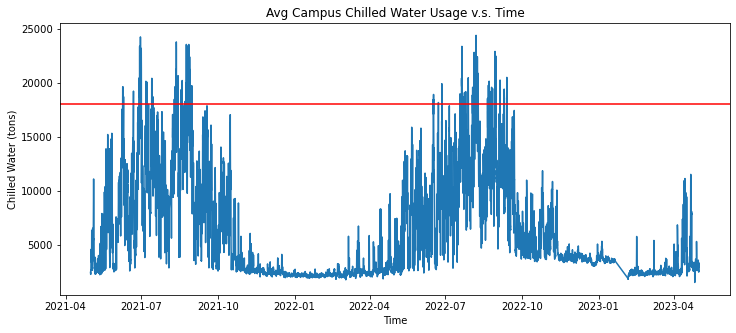

In [390]:
plt.figure(figsize = (12, 5))
plt.plot(df["time"], df["chilled_water"])
plt.title("Avg Campus Chilled Water Usage v.s. Time")
plt.xlabel("Time")
plt.ylabel("Chilled Water (tons)")
plt.axhline(y = 18000, color = 'r', linestyle = '-')
# df["chilled_water"].value_counts()

Text(0, 0.5, 'Steam (Klbs/hr)')

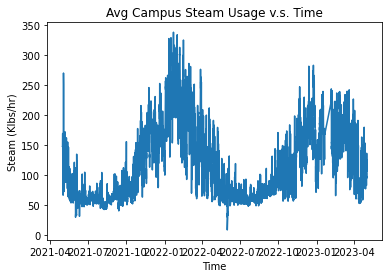

In [391]:
plt.plot(df["time"], df["steam"])
plt.title("Avg Campus Steam Usage v.s. Time")
plt.xlabel("Time")
plt.ylabel("Steam (Klbs/hr)")

Text(0, 0.5, 'Electricity (MW)')

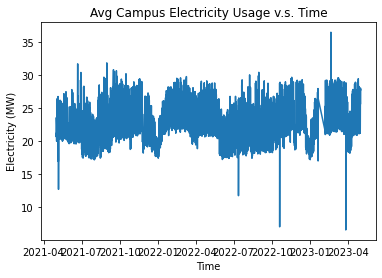

In [392]:
plt.plot(df["time"], df["electricity"])
plt.title("Avg Campus Electricity Usage v.s. Time")
plt.xlabel("Time")
plt.ylabel("Electricity (MW)")

In [393]:
X = df[["temperature_2m (°F)", "relativehumidity_2m (%)", "dewpoint_2m (°F)", "apparent_temperature (°F)", "pressure_msl (hPa)", "surface_pressure (hPa)", "precipitation (inch)", "rain (inch)", "snowfall (inch)", "cloudcover (%)", "cloudcover_low (%)", "cloudcover_mid (%)", "cloudcover_high (%)", "shortwave_radiation (W/m²)", "direct_radiation (W/m²)", "diffuse_radiation (W/m²)", "direct_normal_irradiance (W/m²)", "windspeed_10m (mp/h)", "windspeed_100m (mp/h)"]]
Y = df["chilled_water"]

X = sm.add_constant(X)
model_q1 = sm.OLS(Y, X).fit()
predictions = model_q1.predict(X)
print(predictions)

# plt.scatter(X["temperature_2m (°F)"], Y)
# plt.plot(X["temperature_2m (°F)"], predictions, c="red")
# plt.title("Avg Campus Chilled Water Usage v.s. Outdoor Temperature")
# plt.xlabel("Outdoor Temperature (°F)")
# plt.ylabel("Chilled Water (tons)")
# plt.show()

model_q1.summary()

0        2363.197900
1        1877.420906
2        1746.147393
3        2000.771404
4        1858.922573
            ...     
17406    3281.088566
17407    3345.547519
17408    2641.944720
17409    3249.547685
17410    4287.154581
Length: 16982, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chilled_water   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     7163.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        14:36:25   Log-Likelihood:            -1.4942e+05
No. Observations:               16982   AIC:                         2.989e+05
Df Residuals:                   16963   BIC:                         2.990e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -3.945e+04   2402.333    -16.423      0.000   -4.42e+04   -3.47e+04
temperature_2m (°F)              -363.6019     29.296    -12.411      0.000    -421.026    -306.178
relativehumidity_2m (%)             7.2861      4.971      1.466      0.143      -2.457      17.029
dewpoint_2m (°F)                 -229.2220     13.586    -16.873      0.000    -255.851    -202.593
apparent_temperature (°F)        1206.7284     13.047     92.491      0.000    1181.155    1232.302
pressure_msl (hPa)               9931.7165    271.129     36.631      0.000    9400.275    1.05e+04
surface_pressure (hPa)          -1.027e+04    280.674    -36.579      0.000   -1.08e+04   -9716.709
precipitation (inch)             2.547e+04   7.14e+04      0.357      0.721   -1.14e+05    1.65e+05
rain (inch)                     -2.644e+04   7.14e+04     -0.370      0.711   -1.66e+05    1.13e+05
snowfall (inch)                    61.2491   1.02e+04      0.006      0.995   -1.99e+04       2e+04
cloudcover (%)                      8.2125      1.138      7.213      0.000       5.981      10.444
cloudcover_low (%)                 -3.6219      0.834     -4.341      0.000      -5.257      -1.987
cloudcover_mid (%)                 -1.6202      0.641     -2.529      0.011      -2.876      -0.365
cloudcover_high (%)                -4.2195      0.409    -10.317      0.000      -5.021      -3.418
shortwave_radiation (W/m²)         -1.1520      0.093    -12.372      0.000      -1.334      -0.969
direct_radiation (W/m²)            -4.8105      0.161    -29.798      0.000      -5.127      -4.494
diffuse_radiation (W/m²)            3.6586      0.170     21.480      0.000       3.325       3.992
direct_normal_irradiance (W/m²)     2.1717      0.125     17.411      0.000       1.927       2.416
windspeed_10m (mp/h)              625.2576     17.319     36.103      0.000     591.311     659.204
windspeed_100m (mp/h)             -59.2573      9.726     -6.093      0.000     -78.321     -40.193
==============================================================================
Omnibus:                     1747.463   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5495.218
Skew:                           0.535   Prob(JB):                         0.00
Kurtosis:                       5.573   Cond. No.                     4.74e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [394]:
df["temperature_2m (°F)^2"] = np.power(df["temperature_2m (°F)"], 2)
df["temperature_2m (°F)^3"] = np.power(df["temperature_2m (°F)"], 3)
df

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h),chilled_water,steam,electricity,temperature_2m (°F)^2,temperature_2m (°F)^3
0,2021-05-01 00:00:00-04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,0,0,0.0,13.2,22.9,2451.87975,147.684086,21.180990,1398.76,52313.624
1,2021-05-01 01:00:00-04:00,37.0,76,30.1,27.4,1012.5,977.4,0.004,0.000,0.028,...,0,0,0.0,13.0,25.2,2385.74125,147.614200,21.046370,1369.00,50653.000
2,2021-05-01 02:00:00-04:00,37.0,74,29.6,26.7,1013.3,978.2,0.000,0.000,0.000,...,0,0,0.0,14.6,25.6,2314.83125,151.649156,20.794573,1369.00,50653.000
3,2021-05-01 03:00:00-04:00,36.4,85,32.3,27.5,1014.0,978.8,0.000,0.000,0.000,...,0,0,0.0,12.2,20.8,2319.18375,147.774962,20.755208,1324.96,48228.544
4,2021-05-01 04:00:00-04:00,36.8,83,32.0,28.3,1014.9,979.7,0.000,0.000,0.000,...,0,0,0.0,10.9,19.5,2361.69675,150.348843,20.699110,1354.24,49836.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17406,2023-05-01 15:00:00-04:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,257,265,314.4,13.4,20.5,3289.04225,106.263122,27.715608,2830.24,150568.768
17407,2023-05-01 16:00:00-04:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,264,232,326.5,12.1,18.2,3060.91725,124.254375,28.095195,2490.01,124251.499
17408,2023-05-01 17:00:00-04:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,263,185,387.8,11.0,16.8,3036.43975,108.202820,26.360443,2430.49,119823.157
17409,2023-05-01 18:00:00-04:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,237,120,484.1,7.2,12.0,3170.22075,111.019855,26.238255,2520.04,126506.008


0        3057.718727
1        2973.122962
2        2973.122962
3        2846.229314
4        2930.825080
            ...     
17406    6399.251450
17407    5701.336388
17408    5574.442740
17409    5764.783212
17410    5637.889564
Length: 16982, dtype: float64


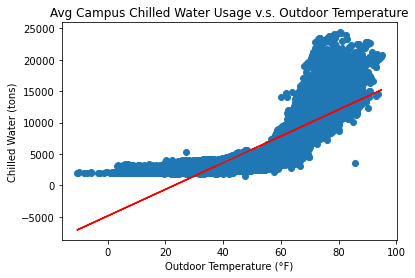

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chilled_water   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                 3.722e+04
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        14:36:25   Log-Likelihood:            -1.5783e+05
No. Observations:               16982   AIC:                         3.157e+05
Df Residuals:                   16980   BIC:                         3.157e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4851.9853     60.699    -79.935      0.000   -4970.962   -4733.009
temperature_2m (°F)   211.4894      1.096    192.925      0.000     209.341     213.638
==============================================================================
Omnibus:                     2578.897   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4224.025
Skew:                           1.031   Prob(JB):                         0.00
Kurtosis:                       4.310   Cond. No.                         166.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [395]:
X = df[["temperature_2m (°F)"]]
X = sm.add_constant(X)
model_1 = sm.OLS(Y, X).fit()
predictions = model_1.predict(X)
print(predictions)

plt.scatter(df["temperature_2m (°F)"], Y)
plt.plot(df["temperature_2m (°F)"], predictions, c="red")
plt.title("Avg Campus Chilled Water Usage v.s. Outdoor Temperature")
plt.xlabel("Outdoor Temperature (°F)")
plt.ylabel("Chilled Water (tons)")
plt.show()

model_1.summary()

0        2521.720932
1        2456.216282
2        2456.216282
3        2359.279966
4        2423.728089
            ...     
17406    5672.547417
17407    4923.668148
17408    4792.658849
17409    4989.767094
17410    4857.965400
Length: 16982, dtype: float64


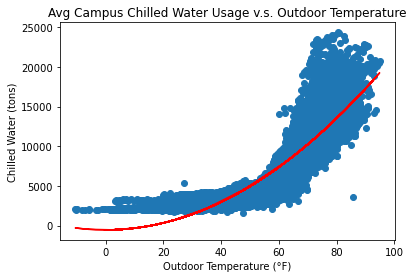

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chilled_water   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                 6.470e+04
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        14:36:26   Log-Likelihood:            -1.5435e+05
No. Observations:               16982   AIC:                         3.087e+05
Df Residuals:                   16980   BIC:                         3.087e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -557.0857     31.217    -17.845      0.000    -618.275    -495.896
temperature_2m (°F)^2     2.2011      0.009    254.354      0.000       2.184       2.218
==============================================================================
Omnibus:                     2837.602   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6253.376
Skew:                           0.979   Prob(JB):                         0.00
Kurtosis:                       5.238   Cond. No.                     6.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [396]:
X = df[["temperature_2m (°F)^2"]]
X = sm.add_constant(X)
model_2 = sm.OLS(Y, X).fit()
predictions = model_2.predict(X)
print(predictions)

plt.scatter(df["temperature_2m (°F)"], Y)
plt.plot(df["temperature_2m (°F)"], predictions, c="red")
plt.title("Avg Campus Chilled Water Usage v.s. Outdoor Temperature")
plt.xlabel("Outdoor Temperature (°F)")
plt.ylabel("Chilled Water (tons)")
plt.show()

model_2.summary()

0        2483.503250
1        2440.174526
2        2440.174526
3        2376.916026
4        2418.858334
            ...     
17406    5047.160040
17407    4360.494257
17408    4244.950698
17409    4419.318529
17410    4302.373056
Length: 16982, dtype: float64


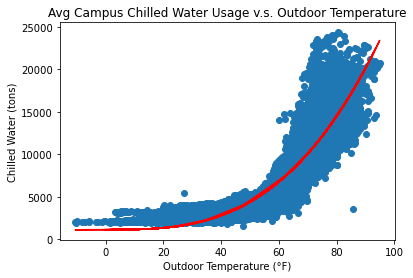

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chilled_water   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 8.593e+04
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        14:36:26   Log-Likelihood:            -1.5239e+05
No. Observations:               16982   AIC:                         3.048e+05
Df Residuals:                   16980   BIC:                         3.048e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1118.5449     22.677     49.326      0.000    1074.096    1162.994
temperature_2m (°F)^3     0.0261    8.9e-05    293.137      0.000       0.026       0.026
==============================================================================
Omnibus:                     3867.845   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15173.866
Skew:                           1.089   Prob(JB):                         0.00
Kurtosis:                       7.086   Cond. No.                     3.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [397]:
X = df[["temperature_2m (°F)^3"]]
X = sm.add_constant(X)
model_3 = sm.OLS(Y, X).fit()
predictions = model_3.predict(X)
print(predictions)

plt.scatter(df["temperature_2m (°F)"], Y)
plt.plot(df["temperature_2m (°F)"], predictions, c="red")
plt.title("Avg Campus Chilled Water Usage v.s. Outdoor Temperature")
plt.xlabel("Outdoor Temperature (°F)")
plt.ylabel("Chilled Water (tons)")
plt.show()

model_3.summary()

In [402]:
x_squared = df["temperature_2m (°F)^2"]
x_cubed = df["temperature_2m (°F)^3"]

def check_assumptions(model, data):
    # checking assumptions-- constant variance
    sns.regplot(data, abs(model.resid), lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s': 0.5})
    plt.show()

    # checking assumptions -- errors are independent
    sns.regplot(model.resid[: -1], model.resid[1:], lowess = True, line_kws = {'color': 'black'} , scatter_kws = { 's' : 0.5})
    plt.show()

    # checking assumptions -- autocorrelation plots
    tsa.plot_acf(model.resid)
    plt.show()

    # checking assumptions -- qq plots
    sm.qqplot(model.resid , line="r")
    plt.show()

X^2 MODEL:


/Users/reidfleishman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


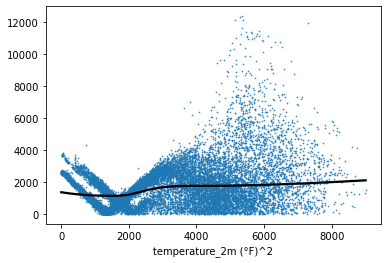

/Users/reidfleishman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


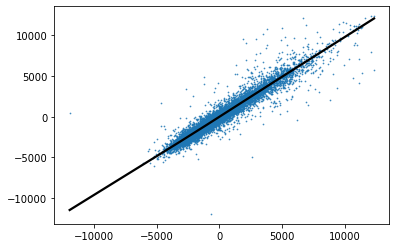

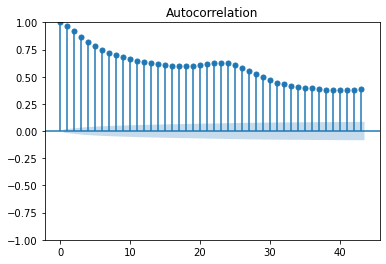

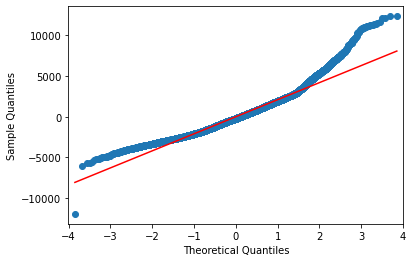

In [403]:
print("X^2 MODEL:")
check_assumptions(model=model_2, data=x_squared)

X^3 MODEL:


/Users/reidfleishman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


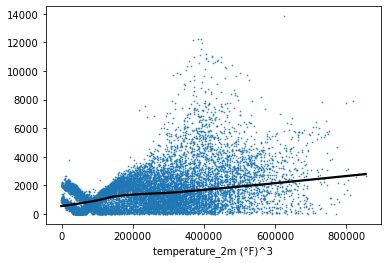

/Users/reidfleishman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


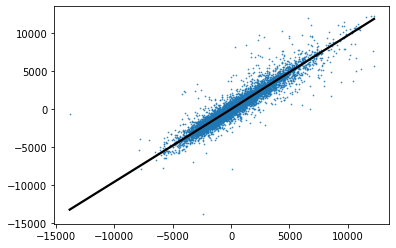

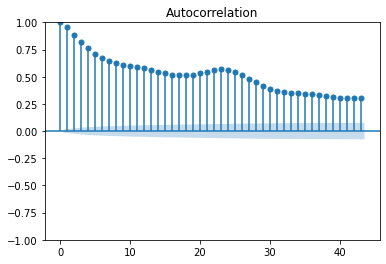

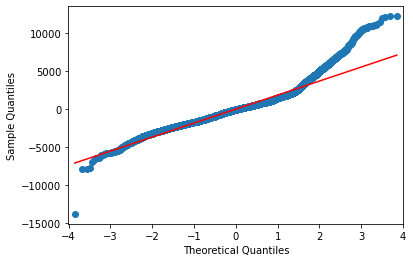

In [404]:
print("X^3 MODEL:")
check_assumptions(model=model_3, data=x_cubed)